In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib notebook
from time import time

import tensorflow as tf
from tensorflow import keras

from useful_functions import load_transform_split, color_scatter, scatter_predvreal, get_metric, plot_performance, ann_fit
from RandomSeedSearchCV import RandomSeedSearchCV, randomseed_ann_maker

from joblib import dump,load

In [2]:
X_train,X_test,y_train,y_test,w_train,w_test,pipeline = load_transform_split(target='DROPOUT_N',
                                                              weight='COHORT_CNT',
                                                              expand=False,
                                                              clean=True,
                                                              split=0.2,
                                                              return_pipeline=True,
                                                              fmt='numpy',
                                                              random_state=42)

wmax = np.max([np.max(w_train),np.max(w_test)])
w_train = (w_train+100)/(wmax+100)
print(np.min(w_train),np.max(w_train))
w_test = (w_test+100)/(wmax+100)
print(np.min(w_test),np.max(w_test))

0.2927536231884058 0.9768115942028985
0.2927536231884058 1.0


Train on 51890 samples
51890/51890 [==============================] - 12s 236us/sample - loss: 1.5249
Train on 51890 samples
Epoch 1/4
51890/51890 [==============================] - 11s 221us/sample - loss: 1.2547
Epoch 2/4
51890/51890 [==============================] - 13s 251us/sample - loss: 1.1643
Epoch 3/4
51890/51890 [==============================] - 13s 244us/sample - loss: 1.0838
Epoch 4/4
51890/51890 [==============================] - 10s 200us/sample - loss: 1.0445
Train on 51890 samples
51890/51890 [==============================] - 22s 422us/sample - loss: 2.2884
Train on 51890 samples
Epoch 1/4
51890/51890 [==============================] - 20s 381us/sample - loss: 2.5115
Epoch 2/4
51890/51890 [==============================] - 19s 367us/sample - loss: 2.5173
Epoch 3/4
51890/51890 [==============================] - 19s 371us/sample - loss: 2.5173
Epoch 4/4
51890/51890 [==============================] - 19s 370us/sample - loss: 2.5173
Train on 51890 samples
51890/51890 [==

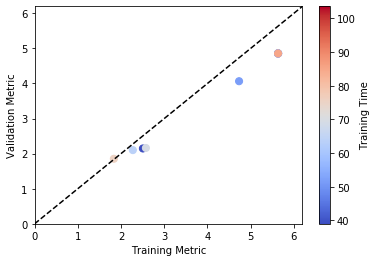

In [4]:
#CAUTION: This cell takes awhile unless you make N small.

optimizer = keras.optimizers.Adam()
#Searching through neural net models.
tbl = RandomSeedSearchCV(randomseed_ann_maker,X_train,y_train,w_train=w_train,N=12,cv=1,
                         input_shape=[X_train.shape[1]],
                         output_shape=1,output_activation='relu',
                         loss='mean_squared_error',optimizer=optimizer,
                         custom_fit = ann_fit,
                         fit_params={'epochs':5,'bail_init_loss':3.5})
print(tbl)

#Get best model.
best_seed = int(tbl[0,0])
best_model = randomseed_ann_maker(best_seed,input_shape=[X_train.shape[1]],
                                  output_shape=1,output_activation='relu',
                                  loss='mean_squared_error',optimizer=optimizer)

In [6]:
best_model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_166 (Dense)            (None, 17)                340       
_________________________________________________________________
dense_167 (Dense)            (None, 15)                270       
_________________________________________________________________
dense_168 (Dense)            (None, 18)                288       
_________________________________________________________________
dense_169 (Dense)            (None, 3)                 57        
_________________________________________________________________
dense_170 (Dense)            (None, 2)                 8         
_________________________________________________________________
dense_171 (Dense)            (None, 14)                42        
_________________________________________________________________
dense_172 (Dense)            (None, 12)              

In [9]:
best_model = randomseed_ann_maker(best_seed,input_shape=[X_train.shape[1]],
                                  output_shape=1,output_activation='relu',
                                  loss='mean_squared_error',optimizer=optimizer)
best_model.fit(X_train,y_train,epochs=5,sample_weight=w_train)

Train on 57656 samples
Epoch 1/5
57656/57656 [==============================] - 14s 245us/sample - loss: 1.1369
Epoch 2/5
57656/57656 [==============================] - 16s 278us/sample - loss: 0.9082
Epoch 3/5
57656/57656 [==============================] - 14s 245us/sample - loss: 0.8704
Epoch 4/5
57656/57656 [==============================] - 14s 246us/sample - loss: 0.8250
Epoch 5/5
57656/57656 [==============================] - 14s 249us/sample - loss: 0.8202


In [12]:
best_model.fit(X_train,y_train,epochs=5,sample_weight=w_train)

Train on 57656 samples
Epoch 1/5
57656/57656 [==============================] - 17s 298us/sample - loss: 0.8259
Epoch 2/5
57656/57656 [==============================] - 14s 250us/sample - loss: 0.7930
Epoch 3/5
57656/57656 [==============================] - 14s 249us/sample - loss: 0.7846
Epoch 4/5
57656/57656 [==============================] - 14s 250us/sample - loss: 0.8134
Epoch 5/5
57656/57656 [==============================] - 15s 264us/sample - loss: 0.7638


In [14]:
best_model.fit(X_train,y_train,epochs=5,sample_weight=w_train)

Train on 57656 samples
Epoch 1/5
57656/57656 [==============================] - 12s 209us/sample - loss: 0.7477
Epoch 2/5
57656/57656 [==============================] - 14s 239us/sample - loss: 0.7546
Epoch 3/5
57656/57656 [==============================] - 16s 273us/sample - loss: 0.7437
Epoch 4/5
57656/57656 [==============================] - 15s 264us/sample - loss: 0.7616
Epoch 5/5
57656/57656 [==============================] - 14s 250us/sample - loss: 0.7696


In [17]:
best_model.fit(X_train,y_train,epochs=5,sample_weight=w_train)

Train on 57656 samples
Epoch 1/5
57656/57656 [==============================] - 17s 289us/sample - loss: 0.7374
Epoch 2/5
57656/57656 [==============================] - 14s 239us/sample - loss: 0.7672
Epoch 3/5
57656/57656 [==============================] - 14s 241us/sample - loss: 0.7369
Epoch 4/5
57656/57656 [==============================] - 15s 257us/sample - loss: 0.7360
Epoch 5/5
57656/57656 [==============================] - 14s 249us/sample - loss: 0.7293


In [10]:
mse = get_metric('mean_squared_error')

print("Best RFR: Train RMSE = %.2f, Test RMSE = %.2f"%(
                               np.sqrt(mse(best_model,X_train,y_train)),
                               np.sqrt(mse(best_model,X_test,y_test)),
                               ))

Best RFR: Train RMSE = 1.38, Test RMSE = 1.44


In [11]:
#Store random search output and pickle best model.
np.savetxt("trial1_ANN_randomseedsearch.out",tbl,header='seed  training_mse  validation_mse  training_time(s)')
best_model.save('saved_models/trial1_best_ann_DROPOUT_N.h5') 

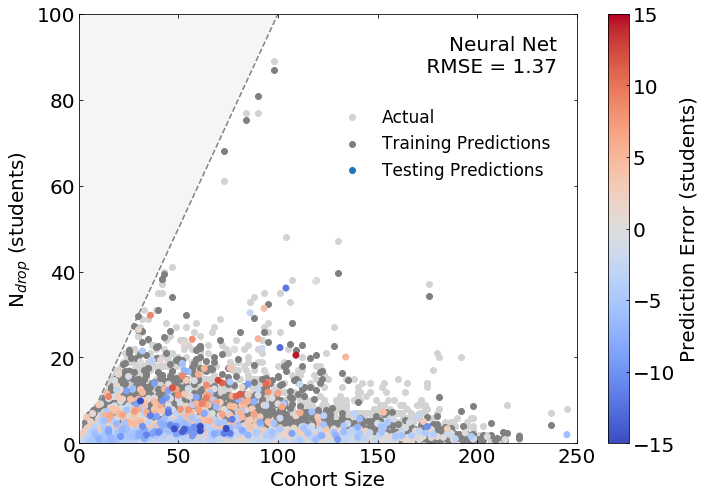

In [18]:
#Make a pretty plot
plt.rcParams.update({
                     'xtick.direction':'in',
                     'xtick.top':True,
                     'xtick.bottom':True,
                     'ytick.direction':'in',
                     'ytick.right':True,
                     'ytick.left':True,
})

#rfr = load('saved_models/best_RandomForestRegressor_DROPOUT_N.joblib')
ann = best_model
ax = plot_performance(ann,'Neural Net',X_train,X_test,y_train,y_test)

plt.tight_layout()
ax.figure.savefig('figures/trial2_best_ann_summary.png',dpi=450)

In [14]:
best_model = randomseed_ann_maker(5,input_shape=[X_train.shape[1]],
                                  output_shape=1,output_activation='relu',
                                  loss='mean_squared_error',optimizer=optimizer)
history = best_model.fit(X_train,y_train,epochs=1)
best_model.summary()

Train on 57656 samples
57656/57656 [==============================] - 25s 440us/sample - loss: 3.2937
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 6)                 120       
_________________________________________________________________
dense_25 (Dense)             (None, 18)                126       
_________________________________________________________________
dense_26 (Dense)             (None, 14)                266       
_________________________________________________________________
dense_27 (Dense)             (None, 9)                 135       
_________________________________________________________________
dense_28 (Dense)             (None, 15)                150       
_________________________________________________________________
dense_29 (Dense)             (None, 11)                176       
__________________

In [22]:
history = best_model.fit(X_train,y_train,epochs=1)

Train on 57656 samples
57656/57656 [==============================] - 17s 291us/sample - loss: 2.6203


In [21]:
history.history['loss']

[2.8101285882030558]

In [13]:
best_model.predict(X_test[:1,:])

array([[-0.]], dtype=float32)

In [7]:
reinit_ann(best_model)

AttributeError: module 'tensorflow' has no attribute 'variables_initializer'

In [12]:
best_model.reset_states()